# Tanzania Water Wells Project

Morgan Nash

August 2025

# Overview

## Business Understanding

In [1]:
#clean drinking water, look deeper to see looking at different features like pump creation or water to predict pump is functional or needs repair
#predict which water pumps are faulty to promote access to clean, potable water across Tanzania
#global climate change->water scarcity->increasing problem in Tanzania, either intense and destructive rainfall or long dry spells.
#classification model to predict functionality of pumps

## Data Understanding

The data for this project comes from Taarifa, who compiled data from the Tanzania Ministry of Water, and was accessed through DrivenData.org. The data contains 59,400 records of water wells, each with 41 features. Our target is **status_group** which contains labeling of whether a pump is functional, functional needs repair, or non functional. After cleaning the data, we'll be using the features to build a classification model to predict the status of water wells.


Training Labels Dataset:
* id: Unique identifier for each water pump
* status_group: contains labels whether a pump is functional, functional needs repair, or non functional

* (status_group will be our target)

Training Values Dataset:
* id: Unique identifier for each water pump
* amount_tsh: Total static head (amount of water available to pump)
* date_recorded: Date the pump data was recorded
* funder: Person or org funded the pump installation
* gps_height: Altitude of the pump location
* installer: Person or org that installed the pump
* longitude: GPS longitude coordinate of the pump location
* latitude: GPS latitude coordinate of the pump location
* wpt_name: Name of the waterpoint (if available)
* num_private: Number of private plots reserved for the waterpoint
* basin: Geographic basin of the pump location
* subvillage: Geographic location within the village
* region: Geographic location
* region_code: Coded- geographic region
* district_code: Coded- administrative district
* lga: Geographic location (Local Government Area)
* ward: Geographic location (Administrative division)
* population: Population served by the well
* public_meeting: T/F Indicator of whether there was a public meeting about the well
* recorded_by: Group entering this row of data
* scheme_management: Who operates the waterpoint
* scheme_name: Who operates the waterpoint
* permit: Indicator of whether the waterpoint is permitted
* construction_year: Year the pump was installed
* extraction_type: The kind of extraction the waterpoint uses
* extraction_type_group: The kind of extraction the waterpoint uses
* extraction_type_class: The kind of extraction the waterpoint uses
* management: Type of management for the pump
* management_group: Grouped management type
* payment: Payment type for water service
* payment_type: Type of payment
* water_quality: Quality of water provided by the pump
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint

# Exploratory Data Analysis

## Data Preparation & Cleaning

In [6]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#load the data
val = pd.read_csv('data/Training_set_values.csv')
val.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


At first glance, it looks like there's many categorical columns that are similar or duplicates suggesting multicollinearity, as well as some categorical columns that will need to be OneHotEncoded!

In [9]:
#load the data
labels = pd.read_csv('data/Training_set_labels.csv')
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [10]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [12]:
labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [13]:
# Check target class (im)balance with percentages: Pretty significant imbalance!!
labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

### Make the target binary:

In [14]:
# make problem binary: change the status_group labels 'non functional' and 'functinoal needs repair' into 'needs repair'
labels['status_group'] = labels['status_group'].map({'non functional':'needs repair',
                                                       'functional needs repair':'needs repair',
                                                       'functional':'functional'})

In [15]:
labels['status_group'].value_counts()

functional      32259
needs repair    27141
Name: status_group, dtype: int64

In [16]:
#although not all, this fixes a good amount of class imbalance
labels['status_group'].value_counts(normalize=True)

functional      0.543081
needs repair    0.456919
Name: status_group, dtype: float64

### Combine Values & Labels into One Dataframe

In [17]:
# Merge the two dataframes using shared 'id' column
df = pd.merge(val, labels, how = 'left', on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,needs repair
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [18]:
df.shape

(59400, 41)

In [19]:
#Check for nulls
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

## Cleaning Categorical Columns:

Decide which columns to drop, which that have missing values, and which that we will One Hot Encode after splitting:

In [20]:
#Look further at categorical columns
#compare columns that seem to have overlap and decide which to keep/which to get rid of (ensuring no multicolinearity)
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [21]:
#same value for every record, will drop
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [22]:
#will keep for now
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [23]:
#management group is slightly broader categories of the management column, I'll keep management_group
df[['management_group', 'management']].value_counts()

management_group  management      
user-group        vwc                 40507
                  wug                  6515
                  water board          2933
                  wua                  2535
commercial        private operator     1971
parastatal        parastatal           1768
commercial        water authority       904
other             other                 844
commercial        company               685
unknown           unknown               561
other             other - school         99
commercial        trust                  78
dtype: int64

In [24]:
#waterpoint_type_group and waterpoint_type columns contain the same information:
df[['waterpoint_type_group', 'waterpoint_type']].value_counts()

waterpoint_type_group  waterpoint_type            
communal standpipe     communal standpipe             28522
hand pump              hand pump                      17488
other                  other                           6380
communal standpipe     communal standpipe multiple     6103
improved spring        improved spring                  784
cattle trough          cattle trough                    116
dam                    dam                                7
dtype: int64

In [25]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [26]:
#reminder scheme_name has over half null values- will drop this column
df['scheme_name'].value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
BL K puchini Sisters      1
Kirachi water supply      1
Maga                      1
Rain water harest         1
Kayugi spring source      1
Name: scheme_name, Length: 2696, dtype: int64

In [27]:
#extraction columns are very similar, going to keep extraction_type_class as it is cleaner/concise (all "other.." are in one "other" column. 
df[['extraction_type_class', 'extraction_type_group' , 'extraction_type']].value_counts()

extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               nira/tanira            nira/tanira                   8154
other                  other                  other                         6430
submersible            submersible            submersible                   4764
handpump               swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
handpump               india mark ii          india mark ii                 2400
                       afridev                afridev                       1770
submersible            submersible            ksb                           1415
rope pump              rope pump              other - rope pump              451
handpump               other handpump         other - swn 81                 229
wind-powered           wind-powered  

In [28]:
#these have the same info just slightly different labels
df[['payment_type', 'payment']].value_counts()

payment_type  payment              
never pay     never pay                25348
per bucket    pay per bucket            8985
monthly       pay monthly               8300
unknown       unknown                   8157
on failure    pay when scheme fails     3914
annually      pay annually              3642
other         other                     1054
dtype: int64

In [29]:
#quality_group almost the same as water_quality, for both, over 85% of the values are the same , these offer litle information gain
#and have significant LACK of variance
#will drop for now
df[['water_quality', 'quality_group']].value_counts()

water_quality       quality_group
soft                good             50818
salty               salty             4856
unknown             unknown           1876
milky               milky              804
coloured            colored            490
salty abandoned     salty              339
fluoride            fluoride           200
fluoride abandoned  fluoride            17
dtype: int64

In [33]:
#quantity_group and quantity are duplicates
df[['quantity_group', 'quantity']].value_counts()

quantity_group  quantity    
enough          enough          33186
insufficient    insufficient    15129
dry             dry              6246
seasonal        seasonal         4050
unknown         unknown           789
dtype: int64

In [34]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [35]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [36]:
#going to keep source_type where the distribution is more balanced.
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [37]:
#will One Hot Encode
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [38]:
#percent missing of public_meeting column:
pub_meet_null = (df['public_meeting'].isnull().sum() / len(df['public_meeting']))
pub_meet_null

0.05612794612794613

In [39]:
#will One Hot Encode
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [40]:
#percent missing of permit column:
perm_null = (df['permit'].isnull().sum() / len(df['permit']))
perm_null

0.05144781144781145

In [41]:
#will drop, just name for waterpoint
df['wpt_name'].value_counts()

none                    3563
Shuleni                 1748
Zahanati                 830
Msikitini                535
Kanisani                 323
                        ... 
Kwa Stephano Kwowero       1
Kwa Gabriel George         1
Kameteri                   1
Kwa Daudi Milyango         1
Naulongo                   1
Name: wpt_name, Length: 37400, dtype: int64

### Cleaning Funder & Installer Columns

#df[['funder', 'installer']].value_counts()

#len(df['installer'].value_counts())

#len(df['funder'].value_counts())

#matches = (df['funder'] == df['installer'])
#sum_of_matches = matches.sum()
#print(sum_of_matches)

#The following code cell is copied from Leonard Gachimu. It cleans up the installer column.
#https://github.com/leogachimu/Tanzania_Water_Wells_Classification/blob/main/student.ipynb

 Replace close variations and misspellings in the installer column

df['installer'] = df['installer'].replace(to_replace = ('Central government', 'Tanzania Government',
                                          'Cental Government','Tanzania government','Cebtral Government', 
                                          'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                                          'TANZANIA GOVERNMENT', 'TANZANIAN GOVERNMENT', 'Central govt', 
                                          'Centr', 'Centra govt', 'Tanzanian Government', 'Tanzania', 
                                          'Tanz', 'Tanza', 'GOVERNMENT', 
                                          'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN', 'Gover', 'Gove', 'gover', 
                                          'Governme', 'Governmen', 'Got', 'Serikali', 'Serikari', 'Government',
                                          'Central Government'), 
                                          value = 'Central Government')

df['installer'] = df['installer'].replace(to_replace = ('IDARA', 'Idara ya maji', 'MINISTRY OF WATER',
                                          'Ministry of water', 'Ministry of water engineer', 'MINISTRYOF WATER', 
                                          'MWE &', 'MWE', 'Wizara ya maji', 'WIZARA', 'wizara ya maji',
                                          'Ministry of Water'), 
                                          value ='Ministry of Water')

df['installer'] = df['installer'].replace(to_replace = ('District COUNCIL', 'DISTRICT COUNCIL',
                                          'Counc','District council','District Counci', 
                                          'Council', 'COUN', 'Distri', 'Halmashauri ya wilaya',
                                          'Halmashauri wilaya', 'District Council'), 
                                          value = 'District  Council')

df['installer'] = df['installer'].replace(to_replace = ('District water depar', 'District Water Department', 
                                          'District water department', 'Distric Water Department'),
                                          value = 'District Water Department')

df['installer'] = df['installer'].replace(to_replace = ('villigers', 'villager', 'villagers', 'Villa', 'Village',
                                          'Villi', 'Village Council', 'Village Counil', 'Villages', 'Vill', 
                                          'Village community', 'Villaers', 'Village Community', 'Villag',
                                          'Villege Council', 'Village council', 'Villege Council', 'Villagerd', 
                                          'Villager', 'VILLAGER', 'Villagers',  'Villagerd', 'Village Technician', 
                                          'Village water attendant', 'Village Office', 'VILLAGE COUNCIL',
                                          'VILLAGE COUNCIL .ODA', 'VILLAGE COUNCIL Orpha', 'Village community members', 
                                          'VILLAG', 'VILLAGE', 'Village Government', 'Village government', 
                                          'Village Govt', 'Village govt', 'VILLAGERS', 'VILLAGE WATER COMMISSION',
                                          'Village water committee', 'Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 
                                           'Comunity', 'Communit', 'Kijiji', 'Serikali ya kijiji', 'Community'), 
                                          value ='Community')

df['installer'] = df['installer'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER',
                                          'Finwater', 'FINN WATER', 'FinW', 'FW', 'FinWater', 'FiNI WATER', 'fini water',
                                          'FinWate', 'FINLAND', 'Fin Water', 'Finland Government'), 
                                          value ='Finnish Government')

df['installer'] = df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH',
                                          'RC church', 'RC CATHORIC', 'Roman Church', 'Roman Catholic',
                                          'Roman catholic', 'Roman Ca', 'Roman', 'Romam', 'Roma', 
                                          'ROMAN CATHOLIC', 'Kanisa', 'Kanisa katoliki'), 
                                          value ='Roman Catholic Church')

df['installer'] = df['installer'].replace(to_replace = ('Dmdd', 'DMDD'), value ='DMDD') 

df['installer'] = df['installer'].replace(to_replace = ('TASA', 'Tasaf', 'TASAF 1', 'TASAF/', 'TASF',
                                          'TASSAF', 'TASAF'), value ='TASAF') 

df['installer'] = df['installer'].replace(to_replace = ('RW', 'RWE'), value ='RWE')

df['installer'] = df['installer'].replace(to_replace = ('SEMA CO LTD', 'SEMA Consultant', 'SEMA'), value ='SEMA')

df['installer'] = df['installer'].replace(to_replace = ('DW E', 'DW#', 'DW$', 'DWE&', 'DWE/', 'DWE}', 
                                         'DWEB', 'DWE', 'DW'), value ='DWE')

df['installer'] = df['installer'].replace(to_replace = ('No', 'NORA', 'Norad', 'NORAD/', 'NORAD'), 
                                          value ='NORAD') 

df['installer'] = df['installer'].replace(to_replace = ('Ox', 'OXFARM', 'OXFAM'), value ='OXFAM') 

df['installer'] = df['installer'].replace(to_replace = ('PRIV', 'Priva', 'Privat', 'private', 'Private company',
                                          'Private individuals', 'PRIVATE INSTITUTIONS', 'Private owned',
                                          'Private person', 'Private Technician', 'Private'), 
                                          value ='Private') 

df['installer'] = df['installer'].replace(to_replace = ('Ch', 'CH', 'Chiko', 'CHINA', 'China',
                                            'China Goverment'), value ='Chinese Goverment')

df['installer'] = df['installer'].replace(to_replace = ('Unisef','Unicef', 'UNICEF'), value ='UNICEF')
                                          
df['installer'] = df['installer'].replace(to_replace = ('Wedeco','WEDEKO', 'WEDECO'), value ='WEDECO')

df['installer'] = df['installer'].replace(to_replace = ('Wo','WB', 'Word Bank', 'Word bank', 'WBK',
                                          'WORDL BANK', 'World', 'world', 'WORLD BANK', 'World bank',
                                          'world banks', 'World banks', 'WOULD BANK', 'World Bank'), 
                                          value ='World Bank')
                                          
df['installer'] = df['installer'].replace(to_replace = ('Lga', 'LGA'), value ='LGA')

df['installer'] = df['installer'].replace(to_replace = ('World Division', 'World Visiin', 
                                         'World vision', 'WORLD VISION', 'world vision', 'World Vission', 
                                          'World Vision'), 
                                          value ='World Vision')

df['installer'] = df['installer'].replace(to_replace = ('Local', 'Local technician', 'Local  technician',
                                         'local  technician', 'LOCAL CONTRACT', 'local fundi', 
                                         'Local l technician', 'Local te', 'Local technical', 'Local technical tec',
                                         'local technical tec', 'local technician', 'Local technitian',
                                         'local technitian', 'Locall technician', 'Localtechnician',
                                         'Local Contractor'), 
                                          value ='Local Contractor')
                                          
df['installer'] = df['installer'].replace(to_replace = ('DANID', 'DANNY', 'DANNIDA', 'DANIDS', 
                                         'DANIDA CO', 'DANID', 'Danid', 'DANIAD', 'Danda', 'DA',
                                         'DENISH', 'DANIDA'), 
                                          value ='DANIDA')

df['installer'] = df['installer'].replace(to_replace =('Adrs', 'Adra', 'ADRA'), value ='ADRA')
                                          
df['installer'] = df['installer'].replace(to_replace = ('Hesawa', 'hesawa', 'HESAW', 'hesaw',
                                          'HESAWQ', 'HESAWS', 'HESAWZ', 'hesawz', 'hesewa', 'HSW',
                                          'HESAWA'),
                                          value ='HESAWA')

df['installer'] = df['installer'].replace(to_replace = ('Jaica', 'JAICA', 'Jica', 'Jeica', 'JAICA CO', 'JALCA',
                                          'Japan', 'JAPAN', 'JAPAN EMBASSY', 'Japan Government', 'Jicks',
                                          'JIKA', 'jika', 'jiks', 'Embasy of Japan in Tanzania', 'JICA'), 
                                          value ='JICA')

df['installer'] = df['installer'].replace(to_replace = ('KKT', 'KK', 'KKKT Church', 'KkKT', 'KKT C',
                                          'KKKT'), value ='KKKT')

df['installer'] = df['installer'].replace(to_replace = ('0', 'Not Known', 'not known', 'Not kno'), value ='other')

#The following code cell is copied from Leonard Gachimu. I switched 'installer' to be 'funder' for this cell of code so that\
#it cleans up the funder column.
#https://github.com/leogachimu/Tanzania_Water_Wells_Classification/blob/main/student.ipynb

 Replace close variations and misspellings in the funder column

df['funder'] = df['funder'].replace(to_replace = ('Central government', 'Tanzania Government',
                                          'Cental Government','Tanzania government','Cebtral Government', 
                                          'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                                          'TANZANIA GOVERNMENT', 'TANZANIAN GOVERNMENT', 'Central govt', 
                                          'Centr', 'Centra govt', 'Tanzanian Government', 'Tanzania', 
                                          'Tanz', 'Tanza', 'GOVERNMENT', 
                                          'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN', 'Gover', 'Gove', 'gover', 
                                          'Governme', 'Governmen', 'Got', 'Serikali', 'Serikari', 'Government',
                                          'Central Government'), 
                                          value = 'Central Government')

df['funder'] = df['funder'].replace(to_replace = ('IDARA', 'Idara ya maji', 'MINISTRY OF WATER',
                                          'Ministry of water', 'Ministry of water engineer', 'MINISTRYOF WATER', 
                                          'MWE &', 'MWE', 'Wizara ya maji', 'WIZARA', 'wizara ya maji',
                                          'Ministry of Water'), 
                                          value ='Ministry of Water')

df['funder'] = df['funder'].replace(to_replace = ('District COUNCIL', 'DISTRICT COUNCIL',
                                          'Counc','District council','District Counci', 
                                          'Council', 'COUN', 'Distri', 'Halmashauri ya wilaya',
                                          'Halmashauri wilaya', 'District Council'), 
                                          value = 'District  Council')

df['funder'] = df['funder'].replace(to_replace = ('District water depar', 'District Water Department', 
                                          'District water department', 'Distric Water Department'),
                                          value = 'District Water Department')

df['funder'] = df['funder'].replace(to_replace = ('villigers', 'villager', 'villagers', 'Villa', 'Village',
                                          'Villi', 'Village Council', 'Village Counil', 'Villages', 'Vill', 
                                          'Village community', 'Villaers', 'Village Community', 'Villag',
                                          'Villege Council', 'Village council', 'Villege Council', 'Villagerd', 
                                          'Villager', 'VILLAGER', 'Villagers',  'Villagerd', 'Village Technician', 
                                          'Village water attendant', 'Village Office', 'VILLAGE COUNCIL',
                                          'VILLAGE COUNCIL .ODA', 'VILLAGE COUNCIL Orpha', 'Village community members', 
                                          'VILLAG', 'VILLAGE', 'Village Government', 'Village government', 
                                          'Village Govt', 'Village govt', 'VILLAGERS', 'VILLAGE WATER COMMISSION',
                                          'Village water committee', 'Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 
                                           'Comunity', 'Communit', 'Kijiji', 'Serikali ya kijiji', 'Community'), 
                                          value ='Community')

df['funder'] = df['funder'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER',
                                          'Finwater', 'FINN WATER', 'FinW', 'FW', 'FinWater', 'FiNI WATER', 'fini water', 
                                          'FinWate', 'FINLAND', 'Fin Water', 'Finland Government'), 
                                          value ='Finnish Government')

df['funder'] = df['funder'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH',
                                          'RC church', 'RC CATHORIC', 'Roman Church', 'Roman Catholic',
                                          'Roman catholic', 'Roman Ca', 'Roman', 'Romam', 'Roma', 
                                          'ROMAN CATHOLIC', 'Kanisa', 'Kanisa katoliki'), 
                                          value ='Roman Catholic Church')

df['funder'] = df['funder'].replace(to_replace = ('Dmdd', 'DMDD'), value ='DMDD') 

df['funder'] = df['funder'].replace(to_replace = ('TASA', 'Tasaf', 'TASAF 1', 'TASAF/', 'TASF',
                                          'TASSAF', 'TASAF'), value ='TASAF') 

df['funder'] = df['funder'].replace(to_replace = ('RW', 'RWE'), value ='RWE')

df['funder'] = df['funder'].replace(to_replace = ('SEMA CO LTD', 'SEMA Consultant', 'SEMA'), value ='SEMA')

df['funder'] = df['funder'].replace(to_replace = ('DW E', 'DW#', 'DW$', 'DWE&', 'DWE/', 'DWE}', 
                                         'DWEB', 'DWE', 'DW'), value ='DWE')

df['funder'] = df['funder'].replace(to_replace = ('No', 'NORA', 'Norad', 'NORAD/', 'NORAD'), 
                                          value ='NORAD') 

df['funder'] = df['funder'].replace(to_replace = ('Ox', 'OXFARM', 'OXFAM'), value ='OXFAM') 

df['funder'] = df['funder'].replace(to_replace = ('PRIV', 'Priva', 'Privat', 'private', 'Private company',
                                          'Private individuals', 'PRIVATE INSTITUTIONS', 'Private owned',
                                          'Private person', 'Private Technician', 'Private'), 
                                          value ='Private') 

df['funder'] = df['funder'].replace(to_replace = ('Ch', 'CH', 'Chiko', 'CHINA', 'China',
                                            'China Goverment'), value ='Chinese Goverment')

df['funder'] = df['funder'].replace(to_replace = ('Unisef','Unicef', 'UNICEF'), value ='UNICEF')
                                          
df['funder'] = df['funder'].replace(to_replace = ('Wedeco','WEDEKO', 'WEDECO'), value ='WEDECO')

df['funder'] = df['funder'].replace(to_replace = ('Wo','WB', 'Word Bank', 'Word bank', 'WBK',
                                          'WORDL BANK', 'World', 'world', 'WORLD BANK', 'World bank',
                                          'world banks', 'World banks', 'WOULD BANK', 'World Bank'), 
                                          value ='World Bank')
                                          
df['funder'] = df['funder'].replace(to_replace = ('Lga', 'LGA'), value ='LGA')

df['funder'] = df['funder'].replace(to_replace = ('World Division', 'World Visiin', 
                                         'World vision', 'WORLD VISION', 'world vision', 'World Vission', 
                                          'World Vision'), 
                                          value ='World Vision')

df['funder'] = df['funder'].replace(to_replace = ('Local', 'Local technician', 'Local  technician',
                                         'local  technician', 'LOCAL CONTRACT', 'local fundi', 
                                         'Local l technician', 'Local te', 'Local technical', 'Local technical tec',
                                         'local technical tec', 'local technician', 'Local technitian',
                                         'local technitian', 'Locall technician', 'Localtechnician',
                                         'Local Contractor'), 
                                          value ='Local Contractor')
                                          
df['funder'] = df['funder'].replace(to_replace = ('DANID', 'DANNY', 'DANNIDA', 'DANIDS', 
                                         'DANIDA CO', 'DANID', 'Danid', 'DANIAD', 'Danda', 'DA',
                                         'DENISH', 'DANIDA'), 
                                          value ='DANIDA')

df['funder'] = df['funder'].replace(to_replace =('Adrs', 'Adra', 'ADRA'), value ='ADRA')
                                          
df['funder'] = df['funder'].replace(to_replace = ('Hesawa', 'hesawa', 'HESAW', 'hesaw',
                                          'HESAWQ', 'HESAWS', 'HESAWZ', 'hesawz', 'hesewa', 'HSW',
                                          'HESAWA'),
                                          value ='HESAWA')

df['funder'] = df['funder'].replace(to_replace = ('Jaica', 'JAICA', 'Jica', 'Jeica', 'JAICA CO', 'JALCA',
                                          'Japan', 'JAPAN', 'JAPAN EMBASSY', 'Japan Government', 'Jicks',
                                          'JIKA', 'jika', 'jiks', 'Embasy of Japan in Tanzania', 'JICA'), 
                                          value ='JICA')

df['funder'] = df['funder'].replace(to_replace = ('KKT', 'KK', 'KKKT Church', 'KkKT', 'KKT C',
                                          'KKKT'), value ='KKKT')

df['funder'] = df['funder'].replace(to_replace = ('0', 'Not Known', 'not known', 'Not kno'), value ='other')

#df['funder'] = df['funder'].str.lower()
#df['installer'] = df['installer'].str.lower()

#matches = (df['funder'] == df['installer'])
#sum_of_matches = matches.sum()
#print(sum_of_matches)

#df['funder'].value_counts()

#df['installer'].value_counts()

#funder_counts = df['funder'].value_counts()
#rare_funders = funder_counts[funder_counts < 50].index
#df['funder'] = df['funder'].replace(rare_funders, 'other')

#installer_counts = df['installer'].value_counts()
#rare_installers = installer_counts[installer_counts < 50].index
#df['installer'] = df['installer'].replace(rare_installers, 'other')

#len(df['installer'].value_counts())

#len(df['funder'].value_counts())

#df['installer'].value_counts()[:50]

#df['funder'].value_counts()

#df.isna().sum()

#rows with missing data in funder and installer account for about 6% each of the rows of the data. will drop these rows.
#df = df.dropna(subset=['funder', 'installer'])

#df.shape

#52057/59400

#Use chi2_contingency to check which column has a stronger relationship with status_group
from scipy.stats import chi2_contingency

#contingency table for funder vs status_group
funder_contingency_table = pd.crosstab(df['funder'], df['status_group'])
chi2_funder, p_funder, _, _ = chi2_contingency(funder_contingency_table)

#contingency table for installer vs status_group
installer_contingency_table = pd.crosstab(df['installer'], df['status_group'])
chi2_installer, p_installer, _, _ = chi2_contingency(installer_contingency_table)

print(f"Funder Chi-Square Statistic: {chi2_funder:.2f}, P-value: {p_funder:.4f}")
print(f"Installer Chi-Square Statistic: {chi2_installer:.2f}, P-value: {p_installer:.4f}")

#compare and print results:
if chi2_funder > chi2_installer:
    print("\n 'funder' has a stronger relationship with the target.")
else:
    print("\n 'installer' has a stronger relationship with the target.")

## Dropping Categorical Columns:

As you can see, many categorical column pairs have duplicate and/or very similar information. The following are the categorical columns that I will drop as well as the reason to drop:\
**recorded_by**: This is the same string for every entry\
**management**: I will keep management_group which contains slightly broader categories of management\
**waterpoint_type**: redundant with waterpoint_type_group\
**payment**: redundant with payment_type\
**extraction_type** & **extraction_type_group**: keeping extraction_type_class so these are not necessary\
**date_recorded**: I'm keeping construction_year so this is not necessary\
**source_class** & **source**: dropping these as I'll be keeping source_type\
**quantity_group**: redundant with quantity\
**quality_group** & **water_quality**: both have 85% of the values that are the same, lack of variance \
**wpt_name**: just a name for the waterpoint, won't help with modeling\
**subvillage**, **lga**, **ward**: can all be represented by region column\
**scheme_name**: contains too many unique values and too many nulls, keeping scheme_management\
**funder** & **installer**: both have very very high cardinality

In [42]:
df_cleaned = df.drop(['recorded_by', 'management', 'waterpoint_type', 'payment', 'extraction_type', 'extraction_type_group', 
        'date_recorded', 'source_class', 'source', 'quantity_group', 'quality_group', 'water_quality', 'wpt_name', 'subvillage', 'lga', 'ward',
         'scheme_name', 'funder', 'installer'], axis=1)

In [43]:
#check what's left that has missing values:
percent_missing = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

#only show columns with nulls
missing_value_df = pd.DataFrame({'column_name': df_cleaned.columns,
                                 'percent_missing': percent_missing})
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 0]

#print result
print("Percentage of null values per column:")
print(missing_value_df.sort_values('percent_missing', ascending=False))

Percentage of null values per column:
                         column_name  percent_missing
scheme_management  scheme_management         6.526936
public_meeting        public_meeting         5.612795
permit                        permit         5.144781


In [44]:
#drop rows where permit, public_meeting, and scheme_management have missing values:
df_cleaned1 = df_cleaned.dropna(subset=['permit', 'public_meeting', 'scheme_management'])

In [45]:
df_cleaned1.shape

(49841, 22)

In [46]:
df_cleaned1.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,...,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quantity,source_type,waterpoint_type_group,status_group
0,69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,...,VWC,False,1999,gravity,user-group,annually,enough,spring,communal standpipe,functional
2,34310,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,...,VWC,True,2009,gravity,user-group,per bucket,enough,dam,communal standpipe,functional
3,67743,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,...,VWC,True,1986,submersible,user-group,never pay,dry,borehole,communal standpipe,needs repair
5,9944,20.0,0,39.172796,-4.765587,0,Pangani,Tanga,4,8,...,VWC,True,2009,submersible,user-group,per bucket,enough,other,communal standpipe,functional
6,19816,0.0,0,33.362410,-3.766365,0,Internal,Shinyanga,17,3,...,VWC,True,0,handpump,user-group,never pay,enough,borehole,hand pump,needs repair


In [47]:
#print categorical columns after dropping some:
cat_clean = [var for var in df_cleaned1.columns if df_cleaned1[var].dtype=='O']
cat_clean

['basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'quantity',
 'source_type',
 'waterpoint_type_group',
 'status_group']

In [48]:
#double check for nulls:
df_cleaned1.isna().sum()

id                       0
amount_tsh               0
gps_height               0
longitude                0
latitude                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment_type             0
quantity                 0
source_type              0
waterpoint_type_group    0
status_group             0
dtype: int64

### Cleaning Numerical Columns:

In [49]:
#print numerical columns
numerical = [var for var in df_cleaned1.columns if df_cleaned1[var].dtype!='O']
numerical

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [50]:
#check for duplicate records using the id column, if no duplicates in id column, i will assume each row is its own pump
df_cleaned1.duplicated(subset=['id']).sum()

0

In [51]:
#look at Summary Statistics for Numerical Columns:
print("Numeric Column Summary Statistics:")
numerical_stats = df_cleaned1.describe()
print(numerical_stats)

Numeric Column Summary Statistics:
                 id     amount_tsh    gps_height     longitude      latitude  \
count  49841.000000   49841.000000  49841.000000  49841.000000  4.984100e+04   
mean   37111.313316     352.215854    680.790253     34.228834 -5.750202e+00   
std    21437.495653    2793.448736    698.628110      6.260939  2.867979e+00   
min        2.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18545.000000       0.000000      0.000000     33.060320 -8.431873e+00   
50%    37032.000000       0.000000    404.000000     35.125791 -5.099327e+00   
75%    55641.000000      30.000000   1323.000000     37.314108 -3.342912e+00   
max    74247.000000  250000.000000   2770.000000     40.323402 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  49841.000000  49841.000000   49841.000000  49841.000000   
mean       0.537168     14.751891       5.865231    172.184507   
std       13.092193     17.157662       9.9018

In [52]:
#amount total static head- many records have 0.0 but technically, 0.0 could be accurrate, i.e. if the source is groundwater..
df_cleaned1['amount_tsh'].value_counts()

0.0         33667
500.0        2790
50.0         2042
1000.0       1382
20.0         1381
            ...  
5400.0          1
200000.0        1
900.0           1
53.0            1
12.0            1
Name: amount_tsh, Length: 91, dtype: int64

In [53]:
#Over 98% have value 0, will drop as this won't be helpful for modeling..
df_cleaned1['num_private'].value_counts()[:10]

0     49119
6        73
1        68
8        46
5        44
32       40
45       36
15       35
39       30
93       28
Name: num_private, dtype: int64

In [55]:
#a large portion are listed as 0. will check later to see if 0 is the actual elevation or a placeholder value:
df_cleaned1['gps_height'].value_counts()

 0       17148
-15         56
-13         48
 1290       47
-20         44
         ...  
 2332        1
 2417        1
 616         1
 2464        1
 2285        1
Name: gps_height, Length: 2426, dtype: int64

In [56]:
#similar to gps_height, many listed as 0. will address this later:
df_cleaned1['longitude'].value_counts()

0.000000     1336
33.090347       2
32.967009       2
38.180538       2
37.538602       2
             ... 
35.399587       1
33.556570       1
35.833951       1
39.341224       1
35.416063       1
Name: longitude, Length: 48459, dtype: int64

In [57]:
#similar to longitude, same 1336 values are listed as very close to 0, will address this later:
df_cleaned1['latitude'].value_counts()

-2.000000e-08    1336
-2.480043e+00       2
-7.104923e+00       2
-2.467137e+00       2
-2.491942e+00       2
                 ... 
-3.293825e+00       1
-1.223421e+00       1
-4.127133e+00       1
-1.401503e+00       1
-1.101275e+01       1
Name: latitude, Length: 48461, dtype: int64

### Dropping Numerical Columns

The following are the numerical columns I will drop as well as the reason to drop:\
**id**: this is just a unique identifier, will not help with modeling\
**num_private**: over 98% have the value 0\
**region_code** & **district_code**: too similar/redundant with region column\

In [58]:
df_cleaned2 = df_cleaned1.drop(['id', 'num_private', 'region_code', 'district_code'], axis=1)

In [59]:
#Longitude column has 1336 rows with 0.0 and latitude has a matching amount of rows with -2.000000e-08 which is basically zero
#I'll assume these are placeholders as the true values are most likely unknown
#I will drop these rows at it accounts for less than 3% of our remaining data.
df_clean = df_cleaned2[(df_cleaned2['longitude'] != 0.0) | (df_cleaned2['latitude'] != -2.000000e-08)]
df_clean.head()

,amount_tsh,gps_height,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,VWC,False,1999,gravity,user-group,annually,enough,spring,communal standpipe,functional
2,25.0,686,37.460664,-3.821329,Pangani,Manyara,250,True,VWC,True,2009,gravity,user-group,per bucket,enough,dam,communal standpipe,functional
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,VWC,True,1986,submersible,user-group,never pay,dry,borehole,communal standpipe,needs repair
5,20.0,0,39.172796,-4.765587,Pangani,Tanga,1,True,VWC,True,2009,submersible,user-group,per bucket,enough,other,communal standpipe,functional
6,0.0,0,33.362410,-3.766365,Internal,Shinyanga,0,True,VWC,True,0,handpump,user-group,never pay,enough,borehole,hand pump,needs repair


In [60]:
df_clean.shape

(48505, 18)

In [61]:
48505/59400

0.8165824915824916

In [62]:
df_clean.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment_type', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [65]:
#will need to fix years listed as 0:
df_clean['construction_year'].value_counts()[:20]

0       15990
2008     2431
2009     2306
2010     2012
2007     1425
2006     1329
2000     1253
2003     1191
2011     1032
1978      999
2004      989
2002      955
2005      881
1999      881
2012      836
1998      790
1995      783
1985      767
1984      711
1982      695
Name: construction_year, dtype: int64

In [66]:
#new location data frame where I'm keeping rows where gps_height is 0.0 and I will sample and research the longitude/latitude
#and see if the height is actually 0.
df_loc = df_clean.loc[df_clean['gps_height'] == 0.0, ['latitude','longitude', 'gps_height']]
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15812 entries, 5 to 59398
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    15812 non-null  float64
 1   longitude   15812 non-null  float64
 2   gps_height  15812 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 494.1 KB


In [67]:
#taking a random sample:
random_sample = df_loc.sample(n=10)
print(random_sample)

       latitude  longitude  gps_height
6643  -3.337309  33.858162           0
40539 -1.260201  31.428574           0
45411 -4.620133  35.757263           0
5545  -2.535985  33.026691           0
43586 -8.668906  32.347582           0
18807 -1.605952  31.700896           0
37047 -3.415161  33.814108           0
34761 -2.961184  33.376135           0
35718 -9.517648  33.692377           0
44001 -3.870144  33.172784           0


After looking the above locations up, I found that none of them have a true elevation of 0, meaning 0 is definitely used as a placeholder value.

In [68]:
df_clean['population'].value_counts()[:20]

0      16752
1       5763
150     1690
200     1503
250     1279
300     1100
50      1020
100      918
120      812
350      798
500      794
400      566
30       560
60       543
40       526
80       462
20       428
450      390
230      324
600      308
Name: population, dtype: int64

In [69]:
#look at numerical columns after dropping some:
num_clean = [var for var in df_clean.columns if df_clean[var].dtype!='O']
num_clean

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'population',
 'construction_year']

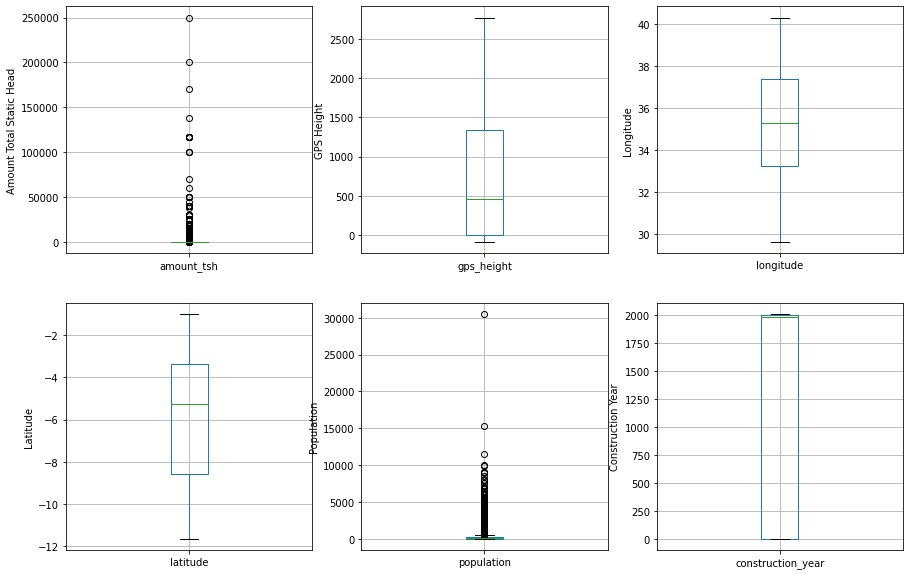

In [70]:
#check outliers:
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
fig = df_clean.boxplot(column='amount_tsh')
fig.set_title('')
fig.set_ylabel('Amount Total Static Head')

plt.subplot(2, 3, 2)
fig = df_clean.boxplot(column='gps_height')
fig.set_title('')
fig.set_ylabel('GPS Height')

plt.subplot(2, 3, 3)
fig = df_clean.boxplot(column='longitude')
fig.set_title('')
fig.set_ylabel('Longitude')

plt.subplot(2, 3, 4)
fig = df_clean.boxplot(column='latitude')
fig.set_title('')
fig.set_ylabel('Latitude')

plt.subplot(2, 3, 5)
fig = df_clean.boxplot(column='population')
fig.set_title('')
fig.set_ylabel('Population')

plt.subplot(2, 3, 6)
fig = df_clean.boxplot(column= 'construction_year')
fig.set_title('')
fig.set_ylabel('Construction Year')

plt.show()

## Modeling

In [71]:
# Label Encode target variable, status_group
le = LabelEncoder()
y = le.fit_transform(df_clean['status_group'])

# Set X to dataframe features without target variable
X = df_clean.drop('status_group', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [72]:
print("Mapping of original labels to integers:")
for i, label in enumerate(le.classes_):
    print(f"{label} is encoded as {i}")

Mapping of original labels to integers:
functional is encoded as 0
needs repair is encoded as 1


In [73]:
X_train.shape, X_test.shape

((38804, 17), (9701, 17))

In [77]:
#Population Column Imputation (dealing with placeholder values in population column)
#Create indicator column in both sets is_population_missing
X_train['is_population_missing'] = (X_train['population'] == 0)
X_test['is_population_missing'] = (X_test['population'] == 0)

#Calculate median poplation on the TRAINING data only by region:
median_by_region = X_train[X_train['population'] != 0].groupby('region')['population'].median()

#Fill missing values in both sets using the training data's median
X_train['population'] = X_train.apply(
    lambda row: median_by_region.get(row['region'], 0) if row['population'] == 0 else row['population'],
    axis=1
)
X_test['population'] = X_test.apply(
    lambda row: median_by_region.get(row['region'], 0) if row['population'] == 0 else row['population'],
    axis=1
)

In [78]:
#Construction Year Column Imputation (dealing with placeholder values in construction_year)
#Create indicator column in both sets is_year_missing
X_train['is_year_missing'] = (X_train['construction_year'] == 0)
X_test['is_year_missing'] = (X_test['construction_year'] == 0)

#Calculate the median year on the TRAINING data only
median_year = X_train.loc[X_train['construction_year'] != 0, 'construction_year'].median()

# Replace the 0s in both sets with the TRAINING median
X_train['construction_year'] = X_train['construction_year'].replace(0, median_year)
X_test['construction_year'] = X_test['construction_year'].replace(0, median_year)

In [79]:
#GPS Height Column Imputation (using KNN) (dealing with placeholder values in gps_height column)
from sklearn.impute import KNNImputer

#Replace the 0.0 values with NaN in both sets
X_train['gps_height'] = X_train['gps_height'].replace(0.0, np.nan)
X_test['gps_height'] = X_test['gps_height'].replace(0.0, np.nan)

#Create a KNN imputer and fit it on the TRAINING data (for every data point that is missing gps_height, this uses longitude and latitude
#columns to find the 5 nearest points, and calculates the average from them, the average is used to fill in the missing value.)
imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_train[['longitude', 'latitude', 'gps_height']])

#Transform both datasets using the fitted imputer:
X_train[['longitude', 'latitude', 'gps_height']] = imputer.transform(X_train[['longitude', 'latitude', 'gps_height']])
X_test[['longitude', 'latitude', 'gps_height']] = imputer.transform(X_test[['longitude', 'latitude', 'gps_height']])

In [80]:
#Select categorical columns to one hot encode:
categorical_features = ['basin', 'region', 'public_meeting', 'scheme_management', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'quantity', 'source_type', 'waterpoint_type_group']

#Instantiate Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

#Fit encoder on the training data only
ohe.fit(X_train[categorical_features])

# Transform both the training and testing sets
X_train_ohe = ohe.transform(X_train[categorical_features])
X_test_ohe = ohe.transform(X_test[categorical_features])


In [81]:
#Need to combine the encoded categorical features back with the numerical features:
#Numeric list to select the columns from our original X_train/X_test
numeric_features = X_train.drop(columns=categorical_features).columns

#Create data frames for the one-hot encoded data
#get_feature_names() to get the new column names
ohe_feature_names = ohe.get_feature_names(categorical_features)

X_train_ohe_df = pd.DataFrame(X_train_ohe, index=X_train.index, columns=ohe_feature_names)
X_test_ohe_df = pd.DataFrame(X_test_ohe, index=X_test.index, columns=ohe_feature_names)

#Concatenate the numerical and one-hot encoded dataframes into "final" versions we can use to model
X_train_final = pd.concat([X_train[numeric_features], X_train_ohe_df], axis=1)
X_test_final = pd.concat([X_test[numeric_features], X_test_ohe_df], axis=1)

#Check the shape and head of "final" datasets
print("Final training data shape:", X_train_final.shape)
print("Final testing data shape:", X_test_final.shape)

print("\nFinal training data head (showing a sample of columns):")
print(X_train_final.head())

Final training data shape: (38804, 91)
Final testing data shape: (9701, 91)

Final training data head (showing a sample of columns):
       amount_tsh  gps_height  longitude  latitude  population  \
45897       100.0      1156.0  34.961715 -6.343662         150   
10168        20.0       -37.0  39.201443 -7.845144           1   
34653         0.0      1306.8  33.881841 -3.175948         500   
5170          0.0      1288.0  31.214473 -8.433142         150   
15316       100.0       304.0  39.043658 -9.918431        1200   

       construction_year  is_population_missing  is_year_missing  \
45897               1981                  False            False   
10168               2003                  False            False   
34653               2000                  False            False   
5170                1986                  False            False   
15316               2007                  False            False   

       basin_Internal  basin_Lake Nyasa  ...  \
45897        

In [82]:
from sklearn.model_selection import cross_val_score

# 1. Instantiate the model
# max_iter is set high to ensure the model converges
baseline_model = LogisticRegression(random_state=42, max_iter=2000)

# 2. Use cross-validation to get the recall scores
# 'recall_weighted' is used because it's a multiclass problem and
# it accounts for class imbalance by weighting the scores by the number of samples in each class.
recall_scores = cross_val_score(baseline_model, X_train_final, y_train, cv=5, scoring='recall_weighted')

# 3. Print the results
print("Individual recall scores from each fold:", recall_scores)
print("Mean recall score (your baseline):", np.mean(recall_scores))

Individual recall scores from each fold: [0.73998196 0.73998196 0.73212215 0.7317356  0.75206186]
Mean recall score (your baseline): 0.7391767056269983


# Conclusions

## Limitations

## Recommendations

## Next Steps